C:\Users\katia\AppData\Roaming\Python\Python38\site-packages\nilearn\datasets\__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
C:\Users\katia\anaconda3\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


[NiftiMapsMasker.fit_transform] loading regions from C:\Users\katia\nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
Resampling maps
[NiftiMapsMasker.transform_single_imgs] Loading data from C:\Users\katia\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals


C:\Users\katia\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\matrix_plotting.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
C:\Users\katia\AppData\Roaming\Python\Python38\site-packages\nilearn\plotting\matrix_plotting.py:30: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


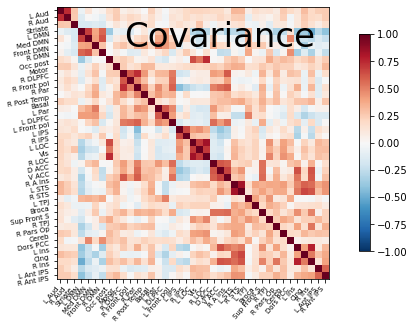

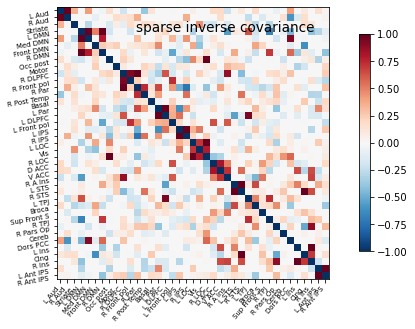

In [1]:
import numpy 
from nilearn import datasets 

#download dataset of one child from fetched data
dev_dataset = datasets.fetch_development_fmri(n_subjects = 1)

#fetching msdl atlas 
msdl_atlas = datasets.fetch_atlas_msdl()
#loading atlas image stored in 'maps'
atlas_filename = msdl_atlas['maps']
#loading atlas data stored in 'labels'
labels = msdl_atlas['labels']


from nilearn.input_data import NiftiMapsMasker
#introducing mask in order to form time series from fmri data 
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize = True, verbose =5)

#create time series using the mask on the dev_dataset
time_series = masker.fit_transform(dev_dataset.func[0], confounds = dev_dataset.confounds)

from sklearn.covariance import GraphicalLassoCV
estimator = GraphicalLassoCV()
estimator.fit(time_series)

from nilearn import plotting
#plotting covariance matrix for 1 subject 
covariance_matrix= estimator.covariance_
plotting.plot_matrix(covariance_matrix, labels = labels, vmax=1, vmin=-1, title= 'Covariance')

#sparse inverse covariance
precision_matrix = -estimator.precision_
plotting.plot_matrix(precision_matrix, labels=labels, vmax=1, vmin=-1, title= 'sparse inverse covariance') 